In [2]:
import pandas as pd
import math

In [3]:
#분석 데이터 불러오기
#분석은 의령군 / 산청군 생활인구, 접근성, 문화공간 현황 분석

per22 = pd.read_csv('22년도 경남 생활인구 데이터.csv', encoding='utf-8')
per23 = pd.read_csv('23년도 경남 생활인구 데이터.csv', encoding='utf-8')


move22 = pd.read_csv('22년도 경남 접근성 데이터셋.csv', encoding='cp949')
move23 = pd.read_csv('23년도 경남 접근성 데이터 셋.csv', sep= '\t',encoding='cp949')

In [4]:
#데이터 확인
per23
per22
move22
move23

,시군구명,접근성 변수명,위도,경도
0,창원시,버스정류장_구암고등학교,35.246296,128.593978
1,창원시,버스정류장_사격장입구,35.244923,128.683156
2,창원시,버스정류장_장애인복지회관입구,35.244960,128.673597
3,창원시,버스정류장_장애인복지회관입구,35.244773,128.673243
4,창원시,버스정류장_지귀상가,35.244778,128.659437
...,...,...,...,...
6920,김해시,지하철_부산김해경전철 수로왕릉,35.232822,128.872141
6921,김해시,지하철_부산김해경전철 연지공원,35.249658,128.869291
6922,김해시,지하철_부산김해경전철 인제대,35.228099,128.901736
6923,김해시,지하철_부산김해경전철 장신대,35.259556,128.867114


In [5]:
#데이터에서 의령군과 산청군만 분리하기

per22 = per22[per22['시군구명'].isin(['의령군','산청군'])]
per23 = per23[per23['시군구명'].isin(['의령군','산청군'])]
move22 = move22[move22['시군구명'].isin(['의령군','산청군'])]
move23 = move23[move23['시군구명'].isin(['의령군','산청군'])]

In [6]:
men_cnt22 =  [int(col.replace(',','')) for col in per22['남']]
men_cnt23 = [int(col.replace(',','')) for col in per23['남']]

w_cnt22 =  [int(col.replace(',','')) for col in per22['여']]
w_cnt23 = [int(col.replace(',','')) for col in per23['여']]


per22['남'] = men_cnt22
per22['여'] = w_cnt22

per23['남'] = men_cnt23
per23['여'] = w_cnt23

In [7]:
per22
per23

,시군구명,접근성 변수명,남,여
28,의령군,세대인구_외국인,625,259
29,의령군,세대인구_성별,12668,12807
30,의령군,거주인구_총인구,13293,13066
31,의령군,연령별_100세 이상인구,5,12
32,의령군,연령별_10대미만 인구,459,13034
33,의령군,연령별_10대인구,719,629
34,의령군,연령별_20대인구,881,580
35,의령군,연령별_30대인구,787,713
36,의령군,연령별_40대인구,1365,1056
37,의령군,연령별_50대인구,2405,1884


In [8]:
#의령 / 산청 데이터나누기

의령인구23 = per23[per23['시군구명']=='의령군']
의령인구23

산청인구23 = per23[per23['시군구명']=='산청군']
산청인구23

김해인구23 = per23[per23['시군구명']=='김해시']

의령인구23

,시군구명,접근성 변수명,남,여
28,의령군,세대인구_외국인,625,259
29,의령군,세대인구_성별,12668,12807
30,의령군,거주인구_총인구,13293,13066
31,의령군,연령별_100세 이상인구,5,12
32,의령군,연령별_10대미만 인구,459,13034
33,의령군,연령별_10대인구,719,629
34,의령군,연령별_20대인구,881,580
35,의령군,연령별_30대인구,787,713
36,의령군,연령별_40대인구,1365,1056
37,의령군,연령별_50대인구,2405,1884


In [127]:
의령거주인구22 = 의령인구22.iloc[0:3]

의령거주인구22['합계'] = 의령거주인구22[['남','여']].sum(axis = 1)
의령거주인구22

C:\Users\user\AppData\Local\Temp\ipykernel_13432\1876208325.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  의령거주인구22['합계'] = 의령거주인구22[['남','여']].sum(axis = 1)


,시군구명,접근성 변수명,남,여,합계
28,의령군,세대인구_외국인,510,230,740
29,의령군,세대인구_성별,12893,13168,26061
30,의령군,거주인구_총인구,13403,13398,26801


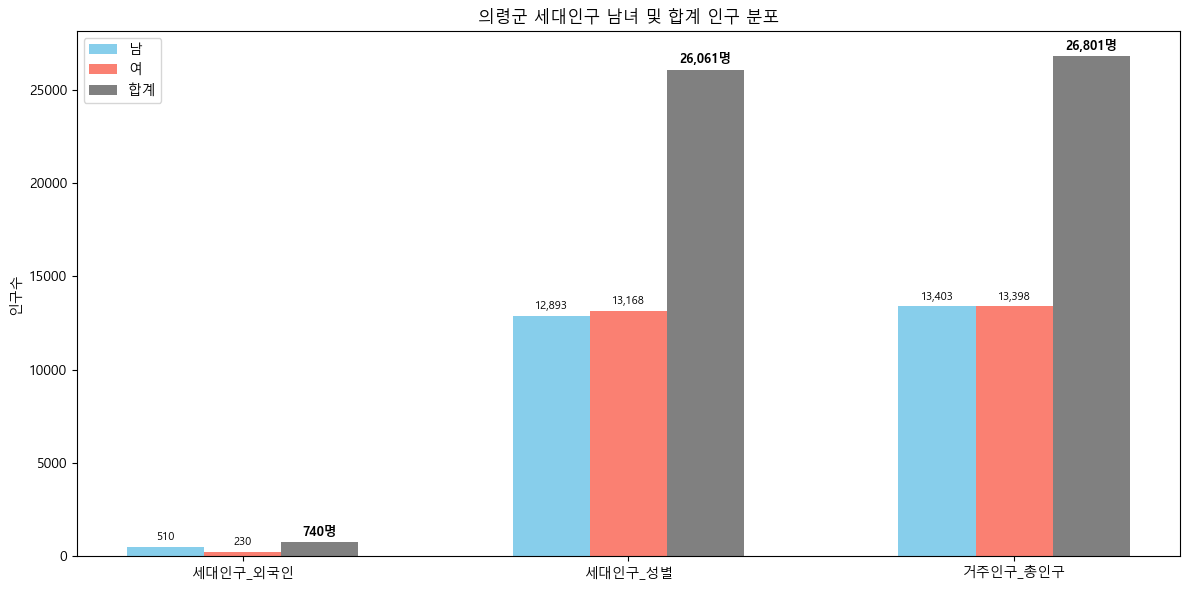

In [134]:
#의령군 22년도 거주인구 분석

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

# x축 라벨
x_label  = 의령거주인구22['접근성 변수명']
men = 의령거주인구22['남']
women = 의령거주인구22['여']
total = 의령거주인구22['합계']

# x 위치 설정
x = np.arange(len(x_label)) * 1.5
bar_width = 0.3

fig, ax = plt.subplots(figsize=(12, 6))

# 막대그래프 생성
bar_men = ax.bar(x - bar_width, men, width=bar_width, label='남', color='skyblue')
bar_women = ax.bar(x, women, width=bar_width, label='여', color='salmon')
bar_total = ax.bar(x + bar_width, total, width=bar_width, label='합계', color='gray')

# 남 텍스트
for bar in bar_men:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 200, f'{height:,}', ha='center', va='bottom', fontsize=8)

# 여 텍스트
for bar in bar_women:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 200, f'{height:,}', ha='center', va='bottom', fontsize=8)

# 합계 텍스트
for bar in bar_total:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 200, f'{height:,}명', ha='center', va='bottom', fontsize=9, fontweight='bold')

# 축, 라벨, 범례
ax.set_xticks(x)
ax.set_xticklabels(x_label, rotation=0)
ax.set_ylabel("인구수")
ax.set_title("의령군 세대인구 남녀 및 합계 인구 분포")
ax.legend()

plt.tight_layout()
plt.show()


In [99]:
의령연령별22 = 의령인구22[
    (의령인구22["접근성 변수명"].str.contains("연령별")) &
    (~의령인구22["접근성 변수명"].str.contains("총인구|성별"))
]

의령연령별22['합계'] = 의령연령별22[['남','여']].sum(axis = 1)
의령연령별22

C:\Users\user\AppData\Local\Temp\ipykernel_13432\3783851855.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  의령연령별22['합계'] = 의령연령별22[['남','여']].sum(axis = 1)


,시군구명,접근성 변수명,남,여,합계
31,의령군,연령별_100세 이상인구,3,14,17
32,의령군,연령별_10대미만 인구,492,433,925
33,의령군,연령별_10대인구,748,667,1415
34,의령군,연령별_20대인구,949,651,1600
35,의령군,연령별_30대인구,839,747,1586
36,의령군,연령별_40대인구,1478,1125,2603
37,의령군,연령별_50대인구,2446,1925,4371
38,의령군,연령별_60대인구,3213,2785,5998
39,의령군,연령별_70대인구,1715,2128,3843
40,의령군,연령별_80대인구,904,2264,3168


In [135]:
산청거주인구22 = 산청인구22.iloc[0:3]

산청거주인구22['합계'] = 산청거주인구22[['남','여']].sum(axis = 1)
산청거주인구22

C:\Users\user\AppData\Local\Temp\ipykernel_13432\4015840032.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  산청거주인구22['합계'] = 산청거주인구22[['남','여']].sum(axis = 1)


,시군구명,접근성 변수명,남,여,합계
42,산청군,세대인구_외국인,282,337,619
43,산청군,세대인구_성별,16871,17157,34028
44,산청군,거주인구_총인구,17153,17494,34647


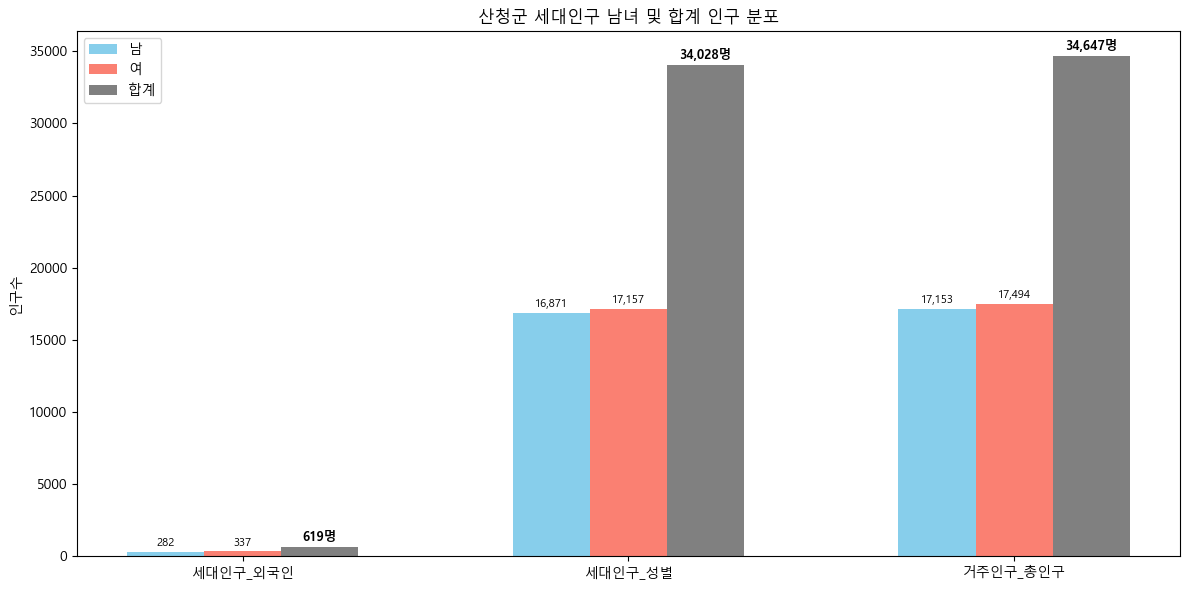

In [137]:
#의령군 22년도 거주인구 분석

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

# x축 라벨
x_label  = 산청거주인구22['접근성 변수명']
men = 산청거주인구22['남']
women = 산청거주인구22['여']
total = 산청거주인구22['합계']

# x 위치 설정
x = np.arange(len(x_label)) * 1.5
bar_width = 0.3

fig, ax = plt.subplots(figsize=(12, 6))

# 막대그래프 생성
bar_men = ax.bar(x - bar_width, men, width=bar_width, label='남', color='skyblue')
bar_women = ax.bar(x, women, width=bar_width, label='여', color='salmon')
bar_total = ax.bar(x + bar_width, total, width=bar_width, label='합계', color='gray')

# 남 텍스트
for bar in bar_men:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 200, f'{height:,}', ha='center', va='bottom', fontsize=8)

# 여 텍스트
for bar in bar_women:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 200, f'{height:,}', ha='center', va='bottom', fontsize=8)

# 합계 텍스트
for bar in bar_total:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 200, f'{height:,}명', ha='center', va='bottom', fontsize=9, fontweight='bold')

# 축, 라벨, 범례
ax.set_xticks(x)
ax.set_xticklabels(x_label, rotation=0)
ax.set_ylabel("인구수")
ax.set_title("산청군 세대인구 남녀 및 합계 인구 분포")
ax.legend()

plt.tight_layout()
plt.show()

In [100]:
의령연령별22["연령순서"] = (
    의령연령별22["접근성 변수명"]
    .str.extract(r'(\d+)', expand=False) 
    .fillna("1000") 
    .astype(int)
)

# 연령순서 기준으로 정렬
의령연령별22 = 의령연령별22.sort_values("연령순서").drop(columns="연령순서")

# 결과 확인
print(의령연령별22)

   시군구명        접근성 변수명     남     여    합계
32  의령군   연령별_10대미만 인구   492   433   925
33  의령군      연령별_10대인구   748   667  1415
34  의령군      연령별_20대인구   949   651  1600
35  의령군      연령별_30대인구   839   747  1586
36  의령군      연령별_40대인구  1478  1125  2603
37  의령군      연령별_50대인구  2446  1925  4371
38  의령군      연령별_60대인구  3213  2785  5998
39  의령군      연령별_70대인구  1715  2128  3843
40  의령군      연령별_80대인구   904  2264  3168
41  의령군      연령별_90대인구   106   429   535
31  의령군  연령별_100세 이상인구     3    14    17


C:\Users\user\AppData\Local\Temp\ipykernel_13432\1791103689.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  의령연령별22["연령순서"] = (


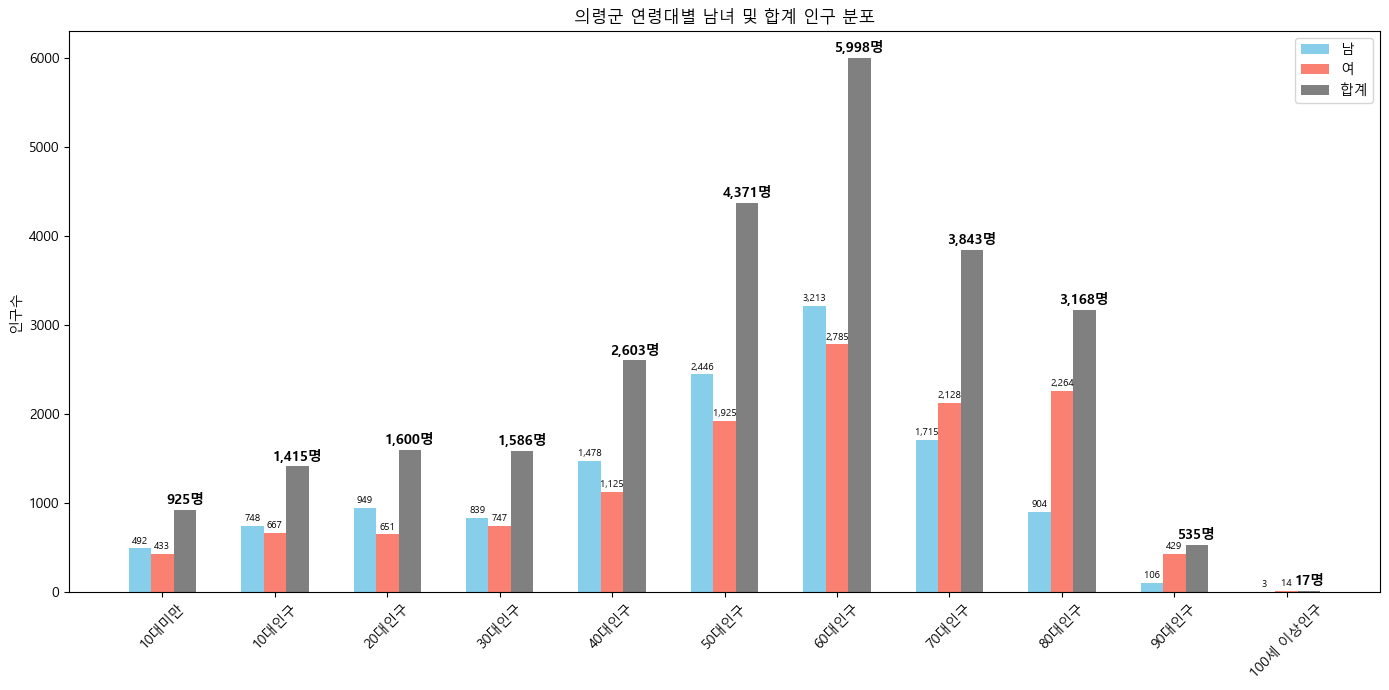

의령군 총인구 수 : 26,061명


In [108]:
#의령군 22년도 생활인구 분석
#의령군 연령대별 인구

import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.family'] = 'Malgun Gothic'

import matplotlib.pyplot as plt
import numpy as np

# 데이터 준비
x_labels = 의령연령별22["접근성 변수명"].str.replace("연령별_", "").str.replace(" 인구", "").str.strip()
men = 의령연령별22["남"]
women = 의령연령별22["여"]
total = 의령연령별22["합계"]

# X 위치 및 막대 너비 설정
x = np.arange(len(x_labels)) * 2  # 간격 넓게
bar_width = 0.4

fig, ax = plt.subplots(figsize=(14, 7))

# 막대그래프: 남, 여, 합계
bars_men = ax.bar(x - bar_width, men, width=bar_width, label="남", color="skyblue")
bars_women = ax.bar(x, women, width=bar_width, label="여", color="salmon")
bars_total = ax.bar(x + bar_width, total, width=bar_width, label="합계", color="gray")

# 텍스트 라벨: 남
for bar in bars_men:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 30, f'{height:,}', ha='center', va='bottom', fontsize=7)

# 텍스트 라벨: 여
for bar in bars_women:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 30, f'{height:,}', ha='center', va='bottom', fontsize=7)

# 텍스트 라벨: 합계
for bar in bars_total:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 30, f'{height:,}명', ha='center', va='bottom', fontsize=10, fontweight='bold')

# 축, 라벨, 범례
ax.set_xticks(x)
ax.set_xticklabels(x_labels, rotation=45)
ax.set_ylabel("인구수")
ax.set_title("의령군 연령대별 남녀 및 합계 인구 분포")
ax.legend()

plt.tight_layout()
plt.show()


print(f'의령군 총인구 수 : {의령연령별22['합계'].sum():,}명')

In [109]:
산청연령별22 = 산청인구22[
    (산청인구22["접근성 변수명"].str.contains("연령별")) &
    (~산청인구22["접근성 변수명"].str.contains("총인구|성별"))
]

산청연령별22['합계'] = 산청연령별22[['남','여']].sum(axis = 1)
산청연령별22

C:\Users\user\AppData\Local\Temp\ipykernel_13432\1766377624.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  산청연령별22['합계'] = 산청연령별22[['남','여']].sum(axis = 1)


,시군구명,접근성 변수명,남,여,합계
45,산청군,연령별_100세 이상인구,3,11,14
46,산청군,연령별_10대미만 인구,572,526,1098
47,산청군,연령별_10대인구,1065,885,1950
48,산청군,연령별_20대인구,1194,893,2087
49,산청군,연령별_30대인구,1019,817,1836
50,산청군,연령별_40대인구,1711,1438,3149
51,산청군,연령별_50대인구,3336,2714,6050
52,산청군,연령별_60대인구,4214,3856,8070
53,산청군,연령별_70대인구,2431,2766,5197
54,산청군,연령별_80대인구,1211,2727,3938


In [103]:
산청연령별22["연령순서"] = (
    산청연령별22["접근성 변수명"]
    .str.extract(r'(\d+)', expand=False) 
    .fillna("1000") 
    .astype(int)
)

# 연령순서 기준으로 정렬
산청연령별22 = 산청연령별22.sort_values("연령순서").drop(columns="연령순서")

# 결과 확인
print(산청연령별22)

   시군구명        접근성 변수명     남     여    합계
46  산청군   연령별_10대미만 인구   572   526  1098
47  산청군      연령별_10대인구  1065   885  1950
48  산청군      연령별_20대인구  1194   893  2087
49  산청군      연령별_30대인구  1019   817  1836
50  산청군      연령별_40대인구  1711  1438  3149
51  산청군      연령별_50대인구  3336  2714  6050
52  산청군      연령별_60대인구  4214  3856  8070
53  산청군      연령별_70대인구  2431  2766  5197
54  산청군      연령별_80대인구  1211  2727  3938
55  산청군      연령별_90대인구   115   524   639
45  산청군  연령별_100세 이상인구     3    11    14


C:\Users\user\AppData\Local\Temp\ipykernel_13432\508536958.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  산청연령별22["연령순서"] = (


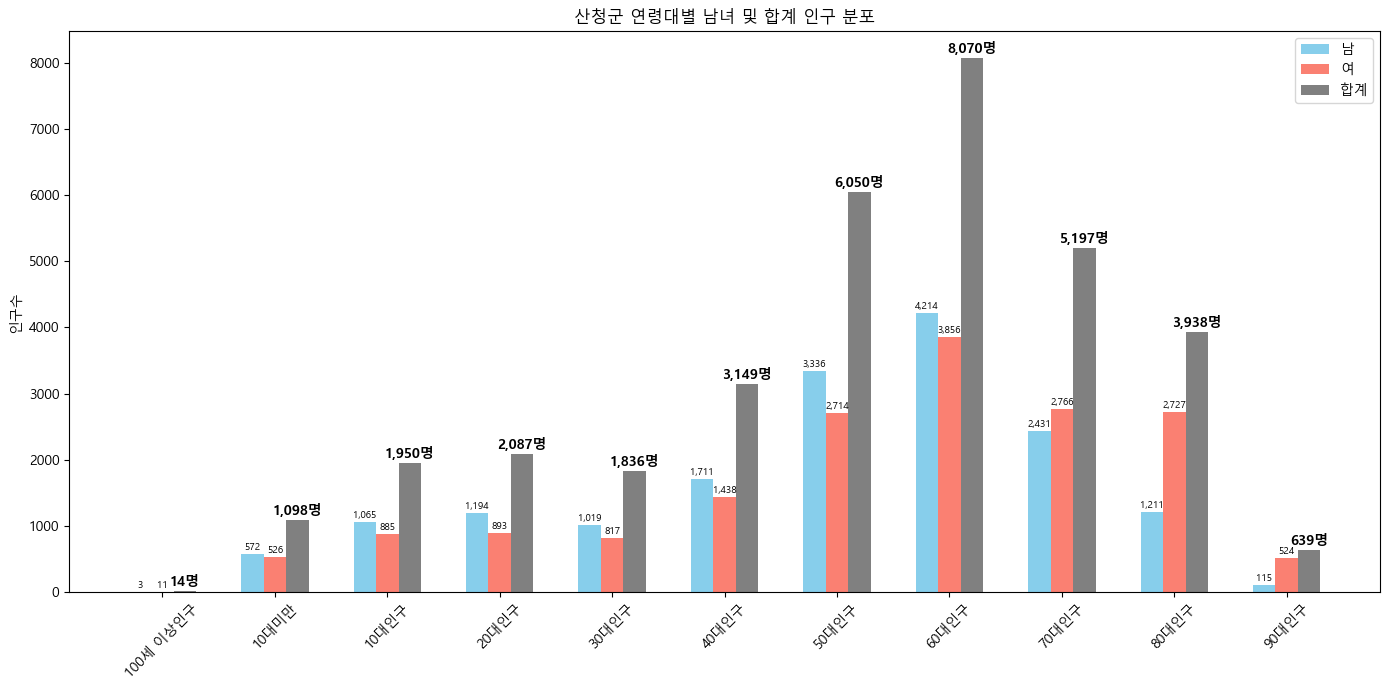

산청군 총인구 수 : 34,028명


In [110]:
#산청군 22년도 생활인구 분석
#신청군 연령대별 인구

import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.family'] = 'Malgun Gothic'

import matplotlib.pyplot as plt
import numpy as np

# 데이터 준비
x_labels = 산청연령별22["접근성 변수명"].str.replace("연령별_", "").str.replace(" 인구", "").str.strip()
men = 산청연령별22["남"]
women = 산청연령별22["여"]
total = 산청연령별22["합계"]

# X 위치 및 막대 너비 설정
x = np.arange(len(x_labels)) * 2  # 간격 넓게
bar_width = 0.4

fig, ax = plt.subplots(figsize=(14, 7))

# 막대그래프: 남, 여, 합계
bars_men = ax.bar(x - bar_width, men, width=bar_width, label="남", color="skyblue")
bars_women = ax.bar(x, women, width=bar_width, label="여", color="salmon")
bars_total = ax.bar(x + bar_width, total, width=bar_width, label="합계", color="gray")

# 텍스트 라벨: 남
for bar in bars_men:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 30, f'{height:,}', ha='center', va='bottom', fontsize=7)

# 텍스트 라벨: 여
for bar in bars_women:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 30, f'{height:,}', ha='center', va='bottom', fontsize=7)

# 텍스트 라벨: 합계
for bar in bars_total:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 30, f'{height:,}명', ha='center', va='bottom', fontsize=10, fontweight='bold')

# 축, 라벨, 범례
ax.set_xticks(x)
ax.set_xticklabels(x_labels, rotation=45)
ax.set_ylabel("인구수")
ax.set_title("산청군 연령대별 남녀 및 합계 인구 분포")
ax.legend()

plt.tight_layout()
plt.show()

print(f'산청군 총인구 수 : {산청연령별22['합계'].sum():,}명')

In [9]:
김해인구23

,시군구명,접근성 변수명,남,여


In [ ]:
#김해 22년도 생활인구 분석
#김해 연령대별 인구

import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.family'] = 'Malgun Gothic'

import matplotlib.pyplot as plt
import numpy as np

# 데이터 준비
x_labels = 산청연령별22["접근성 변수명"].str.replace("연령별_", "").str.replace(" 인구", "").str.strip()
men = 산청연령별22["남"]
women = 산청연령별22["여"]
total = 산청연령별22["합계"]

# X 위치 및 막대 너비 설정
x = np.arange(len(x_labels)) * 2  # 간격 넓게
bar_width = 0.4

fig, ax = plt.subplots(figsize=(14, 7))

# 막대그래프: 남, 여, 합계
bars_men = ax.bar(x - bar_width, men, width=bar_width, label="남", color="skyblue")
bars_women = ax.bar(x, women, width=bar_width, label="여", color="salmon")
bars_total = ax.bar(x + bar_width, total, width=bar_width, label="합계", color="gray")

# 텍스트 라벨: 남
for bar in bars_men:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 30, f'{height:,}', ha='center', va='bottom', fontsize=7)

# 텍스트 라벨: 여
for bar in bars_women:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 30, f'{height:,}', ha='center', va='bottom', fontsize=7)

# 텍스트 라벨: 합계
for bar in bars_total:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 30, f'{height:,}명', ha='center', va='bottom', fontsize=10, fontweight='bold')

# 축, 라벨, 범례
ax.set_xticks(x)
ax.set_xticklabels(x_labels, rotation=45)
ax.set_ylabel("인구수")
ax.set_title("산청군 연령대별 남녀 및 합계 인구 분포")
ax.legend()

plt.tight_layout()
plt.show()

print(f'산청군 총인구 수 : {산청연령별22['합계'].sum():,}명')

In [3]:
#접근성 현황분석


move22
move23

,시군구명,접근성 변수명,위도,경도
0,창원시,버스정류장_구암고등학교,35.246296,128.593978
1,창원시,버스정류장_사격장입구,35.244923,128.683156
2,창원시,버스정류장_장애인복지회관입구,35.244960,128.673597
3,창원시,버스정류장_장애인복지회관입구,35.244773,128.673243
4,창원시,버스정류장_지귀상가,35.244778,128.659437
...,...,...,...,...
6920,김해시,지하철_부산김해경전철 수로왕릉,35.232822,128.872141
6921,김해시,지하철_부산김해경전철 연지공원,35.249658,128.869291
6922,김해시,지하철_부산김해경전철 인제대,35.228099,128.901736
6923,김해시,지하철_부산김해경전철 장신대,35.259556,128.867114


In [4]:
김해22 = move22[move22['시군구명']=='김해시']

창원22 = move22[move22['시군구명']=='창원시']

산청22 = move22[move22['시군구명']=='산청시']

의령22 = move22[move22['시군구명']=='의령시']

print(move22['시군구명'].value_counts())

시군구명
창원시    2973
김해시    2425
산청군     130
의령군      57
Name: count, dtype: int64


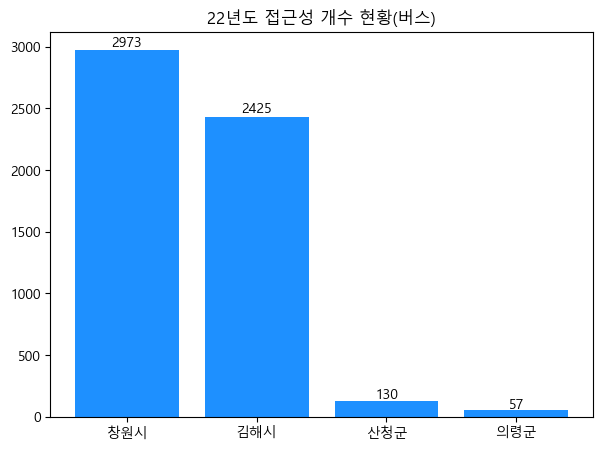

In [64]:
import matplotlib.pyplot as plt

plt.figure(figsize = (7,5))
plt.rcParams['font.family']= 'Malgun Gothic'

x = ['창원시', '김해시', '산청군', '의령군']
y = [2973, 2425, 130, 57]

plt.text(0,2999,str(2973), ha = 'center', fontsize = 10)
plt.text(1, 2470, str(2425), ha = 'center', fontsize = 10)
plt.text(2, 150, str(130), ha = 'center', fontsize = 10)
plt.text(3, 66, str(57), ha = 'center', fontsize = 10)
plt.bar(x,y,color= 'dodgerblue')

plt.title('22년도 접근성 개수 현황(버스)')
plt.show()

In [8]:
cul = pd.read_csv('culture_data.csv',encoding = 'utf-8')

cul

,Unnamed: 0,시군구,소재지,구분
0,2,산청군,산청군 금서면 친환경로2631번길 12,문화예술회관
1,7,의령군,의령군 의령읍 의병로24길 31-1,문화예술회관
2,10,김해시,김해시 김해대로 2062 (내동),문화예술회관
3,13,창원시,창원시 진해구 진해대로 325 (태백동),문화예술회관
4,14,창원시,창원시 마산회원구 삼호로 135,문화예술회관
...,...,...,...,...
142,7,창원시,창원시 진해구 중원로 1,박물관
143,17,창원시,창원시 진해구 중원동로 52 (제황산동),박물관
144,20,김해시,김해시 인제로 197 (어방동),박물관
145,21,창원시,창원시 의창구 퇴촌로 92 (퇴촌동),박물관


In [13]:
groups = cul.groupby('시군구')['구분']

for i,j in groups:
    print(f'{i}의 문화시설 개수 : {len(j)}')

김해시의 문화시설 개수 : 57
산청군의 문화시설 개수 : 8
의령군의 문화시설 개수 : 3
창원시의 문화시설 개수 : 79


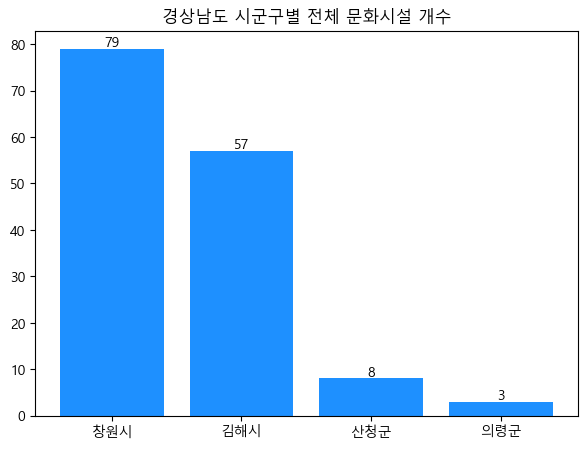

In [54]:
#시군구별 문화시설 개수 현황그래프

import matplotlib.pyplot as plt

plt.figure(figsize = (7,5))
plt.rcParams['font.family'] = 'Malgun gothic'

x = ['창원시', '김해시', '산청군', '의령군']
y = [79, 57, 8, 3]

plt.bar(x,y, color= 'dodgerblue')


plt.text(0,79.5,str(79), ha = 'center', fontsize = 10)
plt.text(1, 57.5, str(57), ha = 'center', fontsize = 10)
plt.text(2, 8.5, str(8), ha = 'center', fontsize = 10)
plt.text(3, 3.5, str(3), ha = 'center', fontsize = 10)

plt.title('경상남도 시군구별 전체 문화시설 개수')


plt.show()

김해시 구분
유원시설업(기타)    31
공연장          13
일반유원시설업       4
박물관           3
종합유원시설업       2
문화예술회관        1
미술관           1
종합휴양업         1
전문휴양업         1
Name: count, dtype: int64
산청군 구분
유원시설업(기타)    4
공연장          2
문화예술회관       1
박물관          1
Name: count, dtype: int64
의령군 구분
문화예술회관       1
공연장          1
유원시설업(기타)    1
Name: count, dtype: int64
창원시 구분
유원시설업(기타)    46
공연장          18
문화예술회관        3
미술관           3
박물관           3
시내순환관광업       2
일반유원시설업       2
종합유원시설업       1
국제회의시설업       1
Name: count, dtype: int64


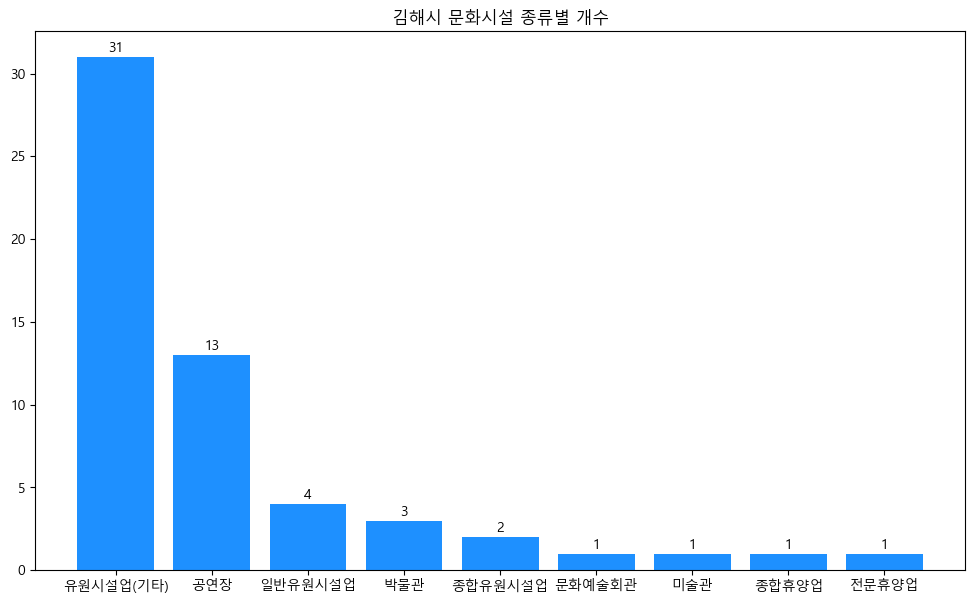

In [93]:
#김해시 문화시설 종류별 개수

for i,j in groups:
    print(i,j.value_counts())


import matplotlib.pyplot as plt

plt.figure(figsize = (12,7))
plt.rcParams['font.family'] = 'Malgun gothic'

x = ['유원시설업(기타)','공연장','일반유원시설업','박물관','종합유원시설업','문화예술회관',
     '미술관','종합휴양업','전문휴양업']
y = [31, 13, 4, 3, 2, 1, 1, 1, 1]

plt.bar(x,y, color= 'dodgerblue')


plt.text(0,31.3,str(31), ha = 'center', fontsize = 10)
plt.text(1, 13.3, str(13), ha = 'center', fontsize = 10)
plt.text(2, 4.3, str(4), ha = 'center', fontsize = 10)
plt.text(3, 3.3, str(3), ha = 'center', fontsize = 10)
plt.text(4, 2.3, str(2), ha = 'center', fontsize = 10)
plt.text(5, 1.3, str(1), ha = 'center', fontsize = 10)
plt.text(6, 1.3, str(1), ha = 'center', fontsize = 10)
plt.text(7, 1.3, str(1), ha = 'center', fontsize = 10)
plt.text(8, 1.3, str(1), ha = 'center', fontsize = 10)



plt.title('김해시 문화시설 종류별 개수')


plt.show()

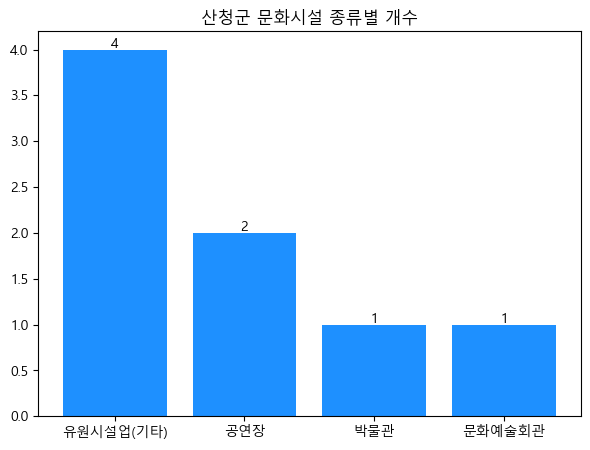

In [108]:
#산청군 
import matplotlib.pyplot as plt

plt.figure(figsize = (7,5))
plt.rcParams['font.family'] = 'Malgun gothic'


x = ['유원시설업(기타)','공연장','박물관','문화예술회관']
y = [4,2,1,1]

plt.bar(x,y, color= 'dodgerblue')


plt.text(0,4.02,str(4), ha = 'center', fontsize = 10)
plt.text(1, 2.02, str(2), ha = 'center', fontsize = 10)
plt.text(2, 1.02, str(1), ha = 'center', fontsize = 10)
plt.text(3, 1.02, str(1), ha = 'center', fontsize = 10)


plt.title('산청군 문화시설 종류별 개수')


plt.show()

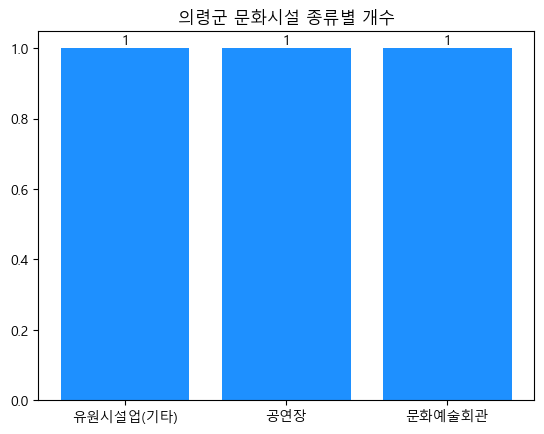

In [112]:
#의령군 
import matplotlib.pyplot as plt

# plt.figure(figsize = (7,5))
plt.rcParams['font.family'] = 'Malgun gothic'


x = ['유원시설업(기타)','공연장','문화예술회관']
y = [1,1,1]

plt.bar(x,y, color= 'dodgerblue')


plt.text(0,1.01,str(1), ha = 'center', fontsize = 10)
plt.text(1, 1.01, str(1), ha = 'center', fontsize = 10)
plt.text(2, 1.01, str(1), ha = 'center', fontsize = 10)

plt.title('의령군 문화시설 종류별 개수')


plt.show()